In [1]:
library(rtracklayer)
library(SummarizedExperiment)
library(DESeq2)
library(Rsubread)
library(data.table)
library(tidyverse)
library(pheatmap)

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

Loading required package: MatrixGenerics

Loading required package: matrixStats




In [2]:
# gtf <- rtracklayer::import('/Genomics/pritykinlab/share/eileen-rnaseq/mm10/gencode.vM23.annotation.gtf')
# gencode <- keepStandardChromosomes(gtf, pruning.mode = "coarse")
# saveRDS(gencode, "datafiles/gencode.rds")
gencode <- readRDS("datafiles/gencode.rds")

In [3]:
# input
bamdir <- "/Genomics/pritykinlab/share/eileen-rnaseq/bam-RNA"
bamfiles <- list.files(bamdir, pattern = "*.bam$")
bamfiles.full <- paste0(bamdir, "/", bamfiles)

In [4]:
length(bamfiles.full)

[1] 162

In [5]:
# genes and exons
print("Prepare collection of all exons for genes in GENCODE")
genes <- levels(as.factor(gencode$gene_name))
exons <- gencode[gencode$type == 'exon']
exons.genes <- disjoin(split(exons, factor(exons$gene_name, levels = genes)))
print("prepared")

[1] "Prepare collection of all exons for genes in GENCODE"
[1] "prepared"


In [6]:
# # count reads in exons
# print("Count overlaps of genes (all exons) with reads")
# print("Use files:")
# print(bamfiles.full)
# exons.table <- as.data.frame(exons) %>%
#                    dplyr::select(GeneID = gene_name, Chr = seqnames,
#                                  Start = start, End = end, Strand = strand)
# # by some reason the commented command below that runs featureCounts()
# # for all files at once doesn't work and aborts the R session on Rstudio,
# # so have to run files one by one, which works fine
# # gene.counts <- sapply(bamfiles.full,
# #     function(filename) {
# #         print(filename)
# #         gene.counts.filename <-
# #             featureCounts(filename, annot.ext = exons.table,
# #                           isPairedEnd = TRUE,
# #                           requireBothEndsMapped = TRUE,
# #                           fracOverlap = 0.8,
# #                           countChimericFragments = FALSE, nthreads = 12)
# #         print(colSums(gene.counts.filename$counts))
# #         gene.counts.filename
# #     }
# # )
# gene.counts <- featureCounts(bamfiles.full, annot.ext = exons.table,
#                              isPairedEnd = TRUE, requireBothEndsMapped = TRUE,
#                              minOverlap = 80,
#                              countChimericFragments = FALSE,
#                              nthreads = 10)
# print("count complete, save the result")
# saveRDS(gene.counts, "datafiles/rna-counts.raw.rds")

In [7]:
print("load the counts")
gene.counts <- readRDS("datafiles/rna-counts.raw.rds")

[1] "load the counts"


In [8]:
attributes(gene.counts)

$names
[1] "counts"     "annotation" "targets"    "stat"

In [9]:
head(gene.counts$counts)

,12DarkATG7KOfemale1911-21-GNP.bam,12DarkATG7KOfemale1911-22-iWAT.bam,12DarkATG7KOfemale1911-23-BAT.bam,12DarkATG7KOfemale1911-24-Liver.bam,12DarkATG7KOfemale1911-25-Cerebellum.bam,12DarkATG7KOfemale1914-26-GNP.bam,12DarkATG7KOfemale1914-27-Liver.bam,12DarkATG7KOfemale1914-28-BAT.bam,12DarkATG7KOfemale1914-29-Cerebellum.bam,12DarkATG7KOfemale1914-30-iWAT.bam,⋯,6LightATG7WT1977-143-BAT.bam,6LightATG7WT1977-144-Liver.bam,6LightATG7WT2040-125-Cerebellum.bam,6LightATG7WT2040-126-BAT.bam,6LightATG7WT2040-127-GNP.bam,6LightATG7WT2040-128-Liver.bam,6LightATG7WT2041-77-Liver.bam,6LightATG7WT2041-78-BAT.bam,6LightATG7WT2041-79-Cerebellum.bam,6LightATG7WT2041-80-GNP.bam
4933401J01Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0
Gm26206,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Xkr4,2,7,6,0,168,4,1,3,285,4,⋯,0,0,153,3,4,3,0,0,109,2
Gm18956,0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,1,0
Gm37180,0,0,0,0,0,0,0,0,0,0,⋯,0,0,7,1,0,0,0,0,0,0
Gm37363,0,0,0,0,0,0,0,0,5,0,⋯,0,0,0,0,0,0,0,0,0,0


In [10]:
gene.counts.df <- as.data.frame(gene.counts$counts)
samplenames <- sapply(strsplit(bamfiles, ".bam"), "[", 1)
print("use these sample names:")
print(samplenames)
print("for these bam files in exactly the same order:")
print(bamfiles)
colnames(gene.counts.df) <- samplenames

[1] "use these sample names:"
  [1] "12DarkATG7KOfemale1911-21-GNP"        
  [2] "12DarkATG7KOfemale1911-22-iWAT"       
  [3] "12DarkATG7KOfemale1911-23-BAT"        
  [4] "12DarkATG7KOfemale1911-24-Liver"      
  [5] "12DarkATG7KOfemale1911-25-Cerebellum" 
  [6] "12DarkATG7KOfemale1914-26-GNP"        
  [7] "12DarkATG7KOfemale1914-27-Liver"      
  [8] "12DarkATG7KOfemale1914-28-BAT"        
  [9] "12DarkATG7KOfemale1914-29-Cerebellum" 
 [10] "12DarkATG7KOfemale1914-30-iWAT"       
 [11] "12DarkATG7KOmale1935-36-Liver"        
 [12] "12DarkATG7KOmale1935-37-BAT"          
 [13] "12DarkATG7KOmale1935-38-iWAT"         
 [14] "12DarkATG7KOmale1935-39-GNP"          
 [15] "12DarkATG7KOmale1935-40-Cerebellum"   
 [16] "12DarkATG7WTfemale2028-46-GNP"        
 [17] "12DarkATG7WTfemale2028-47-BAT"        
 [18] "12DarkATG7WTfemale2028-48-Cerebellum" 
 [19] "12DarkATG7WTfemale2028-49-iWAT"       
 [20] "12DarkATG7WTfemale2028-50-Liver"      
 [21] "12DarkATG7WTmale1981-41-BAT"          
 [22

In [11]:
# process and save results
gene.counts.mat <- as.matrix(gene.counts.df)
gene.names <- sort(names(exons.genes))
gene.counts.mat <- gene.counts.mat[gene.names, ]
# gene.counts <- gene.counts[rowSums(gene.counts) > 0, ]
exons.genes <- exons.genes[gene.names]

In [12]:
fileinfo <- read.csv(file = 'datafiles/metadata_cleaned.csv')
fileinfo$Weeks.Post.Deletion <- as.character(fileinfo$Weeks.Post.Deletion)
fileinfo$Mouse.Genotype.Code <- as.factor(fileinfo$Mouse.Genotype.Code)
tmp <- sub("--","-", fileinfo$filename)
tmp <- sub("GN-P","GNP", tmp)
# three field per sample
tmp <- unlist(strsplit(tmp, '-'))
# get the third one which is the tissue
ind <- seq(from=1, by=3, length=nrow(fileinfo))
fileinfo[, "tissue"] <- tmp[ind + 2]

In [13]:
COND <- fileinfo$tissue=='Liver'
gene.counts.mat.subset <- gene.counts.mat[,fileinfo[COND,]$filename]
fileinfo.subset <- fileinfo[COND,]
rownames(fileinfo.subset) <- fileinfo.subset$sample
gene.counts.se <- SummarizedExperiment(list(counts = gene.counts.mat.subset),
                                       rowRanges = exons.genes)
colData(gene.counts.se) <- cbind(colData(gene.counts.se), fileinfo.subset)

In [14]:
# dds <- DESeqDataSet(gene.counts.se, design = as.formula("~1"))
dds <- DESeqDataSet(gene.counts.se, design = ~ Mouse.Genotype.Code)
dds <- estimateSizeFactors(dds)
normalized.counts <- counts(dds, normalized = TRUE)
# get top 5000 genes
normalized.counts <-
    normalized.counts[order(-rowMeans(normalized.counts)), ][1:5000, ]
normalized.counts.cor <- cor(normalized.counts, method = "spearman")

In [15]:
# pdf("plots/heatmap-normcounts-cor-1.pdf", width = 20, height = 20)
# pheatmap(normalized.counts.cor)
# dev.off()
# pdf("plots/heatmap-normcounts.pdf", width = 20, height = 20)
# pheatmap(normalized.counts, scale = "row", show_rownames = FALSE)
# dev.off()

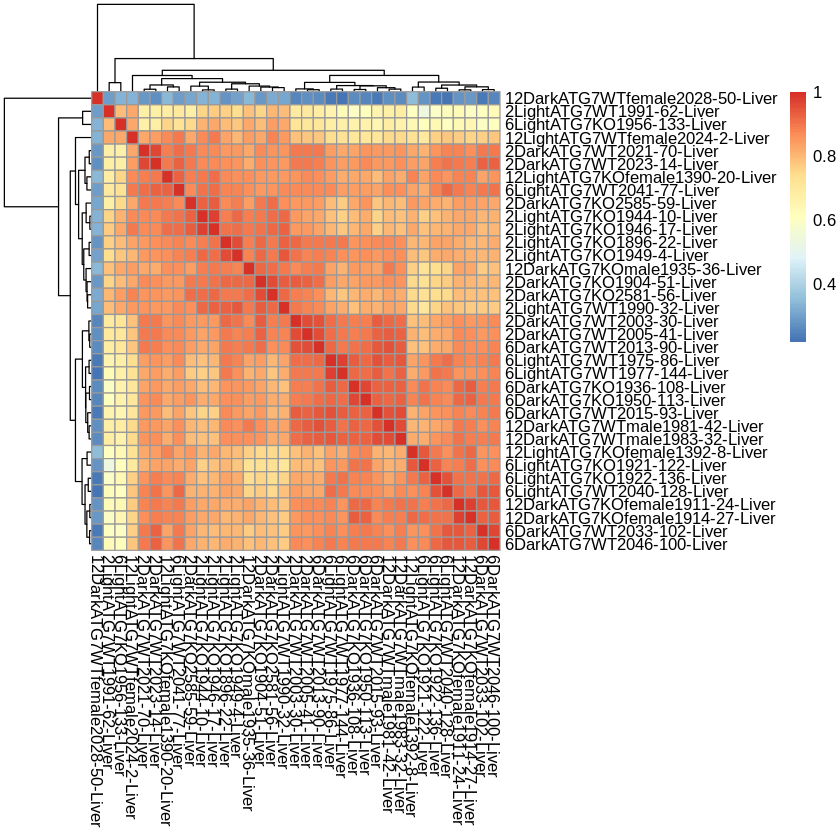

In [16]:
pheatmap(normalized.counts.cor)

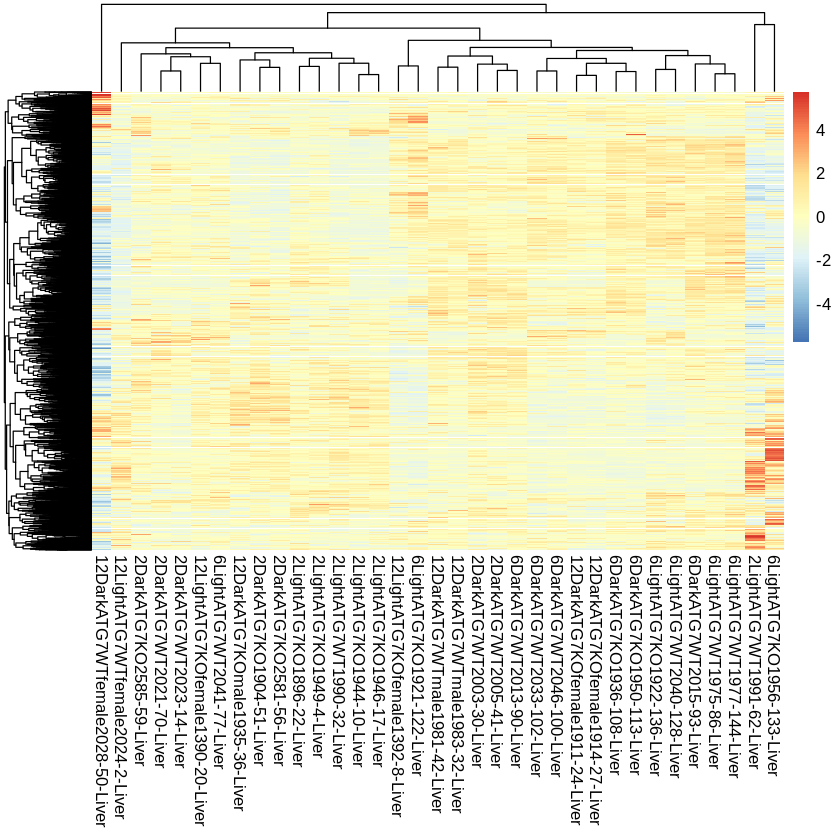

In [17]:
pheatmap(normalized.counts, scale = "row", show_rownames = FALSE)

In [18]:
fileinfo[(fileinfo$tissue=='Liver') & (fileinfo$Weeks.Post.Deletion==12) & (fileinfo$Collection.Cycle=='Light'),]







X,filename,Collection.Cycle,Gender,Mouse.Genotype,Mouse.ID,Weeks.Post.Deletion,Mouse.Genotype.Code,tissue
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<fct>,<chr>


In [19]:
fileinfo[(fileinfo$tissue=='Liver') & (fileinfo$Mouse.ID=='2028'),]


,X,filename,Collection.Cycle,Gender,Mouse.Genotype,Mouse.ID,Weeks.Post.Deletion,Mouse.Genotype.Code,tissue
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<fct>,<chr>
20,19,12DarkATG7WTfemale2028-50-Liver,Dark,Female,Atg7 Wild Type,2028,p12,W,Liver


In [20]:
COND = (fileinfo$tissue=='Liver') & (fileinfo$Mouse.ID!='2028')

In [21]:
gene.counts.mat.subset <- gene.counts.mat[,fileinfo[COND,]$filename]

In [22]:
fileinfo.subset <- fileinfo[COND,]
rownames(fileinfo.subset) <- fileinfo.subset$sample
gene.counts.se <- SummarizedExperiment(list(counts = gene.counts.mat.subset),
                                       rowRanges = exons.genes)
colData(gene.counts.se) <- cbind(colData(gene.counts.se), fileinfo.subset)

In [23]:
# estimate size factors using all genes
# dds <- DESeqDataSet(gene.counts.se, design = as.formula("~1"))
dds <- DESeqDataSet(gene.counts.se, design = ~ Mouse.Genotype.Code)
dds <- estimateSizeFactors(dds)
colData(gene.counts.se)$sizeFactor <- sizeFactors(dds)

normCounts <- function(se) {
    # assign normalized count values to DESeqDataSet object
    # assume rowRanges is a non-empty GRangesList
    # and size factors were computed earlier
    # (e.g., using estimateSizeFactors())
    gene.length <- sum(width(rowRanges(se)))
    counts.norm <- apply(counts(se, normalized = TRUE), 2,
                        function(x){
                            1e3 * x / gene.length
                        })
    assays(se)$counts.norm <- counts.norm
    return(se)
}

dds <- normCounts(dds)
assays(gene.counts.se)$counts.norm <- assays(dds)$counts.norm

In [24]:
# saveRDS(gene.counts.se, "datafiles/rna-counts-batch3.rds")

vsd <- varianceStabilizingTransformation(dds, blind = FALSE)
pcs <- plotPCA(vsd, intgroup = c("Mouse.Genotype.Code", "Collection.Cycle", "Weeks.Post.Deletion", "Gender"), returnData = TRUE)
ggsave("plots/pca-genes-counts-liver-12.pdf")

Saving 6.67 x 6.67 in image



Warning message:
“Using size for a discrete variable is not advised.”


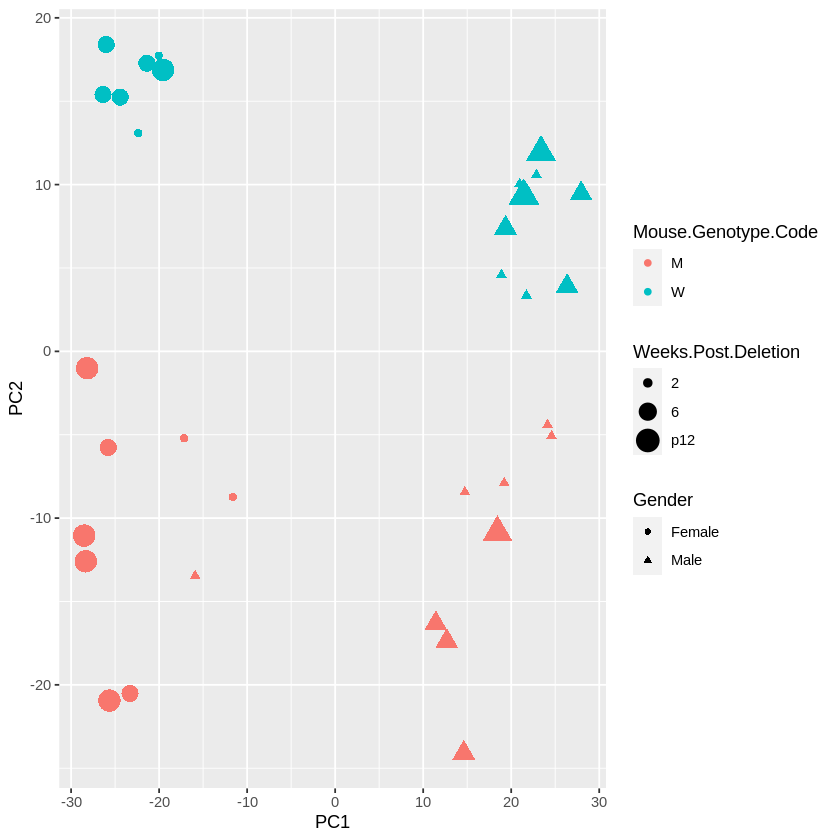

In [25]:
ggplot(data = pcs, mapping = aes(x = PC1, y = PC2)) +
  geom_point(aes(color = Mouse.Genotype.Code, shape = Gender, size=Weeks.Post.Deletion))